In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Import your "MiniTorch" library
from minitorch import Sequential, Linear, ReLU, Sigmoid, CrossEntropyLoss, SGD
from minitorch import save_model, load_model

In [8]:
def load_data():
    """Loads and prepares the Digits dataset and returns train/val/test splits.

    Returns:
        X_train, X_val, X_test, y_train, y_val, y_test
    """
    digits = load_digits()
    X = digits.data.astype(np.float64)
    y = digits.target.astype(np.int32)

    # Scale the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split off test set first (stratified)
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Then split temp into train and validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

In [9]:
# Load data with train/val/test splits
X_train, X_val, X_test, y_train, y_val, y_test = load_data()

n_features = X_train.shape[1]
n_classes = len(np.unique(y_train))

# Slightly larger hidden layer for the more complex dataset
model = Sequential(
    Linear(n_features, 64),
    ReLU(),
    Linear(64, n_classes)
)

# 3. Define Loss and Optimizer
loss_fn = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

print(f"Model created. Input features: {n_features}, Classes: {n_classes}")

Model created. Input features: 64, Classes: 10


In [11]:
# 4. The Training Loop (with validation)
epochs = 1000
batch_size = 32
training_losses = []
best_val_loss = float('inf')
best_model_path = "best_digits_model.npz"

print("Starting training...")
for epoch in range(epochs):

    # Shuffle data each epoch
    permutation = np.random.permutation(X_train.shape[0])
    X_shuffled = X_train[permutation]
    y_shuffled = y_train[permutation]

    epoch_loss = 0.0

    for i in range(0, X_train.shape[0], batch_size):
        # Get mini-batch
        X_batch = X_shuffled[i : i + batch_size]
        y_batch = y_shuffled[i : i + batch_size]

        # --- The 5 steps of training ---
        optimizer.zero_grad()
        y_hat_logits = model(X_batch)
        loss = loss_fn(y_hat_logits, y_batch)
        grad = loss_fn.backward()
        model.backward(grad)
        optimizer.step()

        # loss is per-sample or scalar depending on implementation; multiply by batch size for epoch averaging if scalar
        epoch_loss += loss * X_batch.shape[0]

    epoch_loss /= X_train.shape[0]
    training_losses.append(epoch_loss)

    # Validation evaluation
    y_val_logits = model(X_val)
    y_val_preds = np.argmax(y_val_logits, axis=1)
    val_acc = accuracy_score(y_val, y_val_preds)
    val_loss = loss_fn(y_val_logits, y_val)

    # Save best model by validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        save_model(model, best_model_path)

    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.6f}, Val Loss: {val_loss:.6f}, Val Acc: {val_acc:.2%}")

print("Training complete. Best val loss:", best_val_loss)

Starting training...
Model saved to best_digits_model.npz
Epoch 1/1000, Train Loss: 0.281842, Val Loss: 0.292565, Val Acc: 95.83%
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Epoch 5/1000, Train Loss: 0.247500, Val Loss: 0.261751, Val Acc: 95.83%
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Epoch 10/1000, Train Loss: 0.214872, Val Loss: 0.232824, Val Acc: 95.83%
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Epoch 15/1000, Train Loss: 0.190064, Val Loss: 0.211241, Val Acc: 96.18%
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Model saved to best_digits_model.npz
Model saved to best_dig

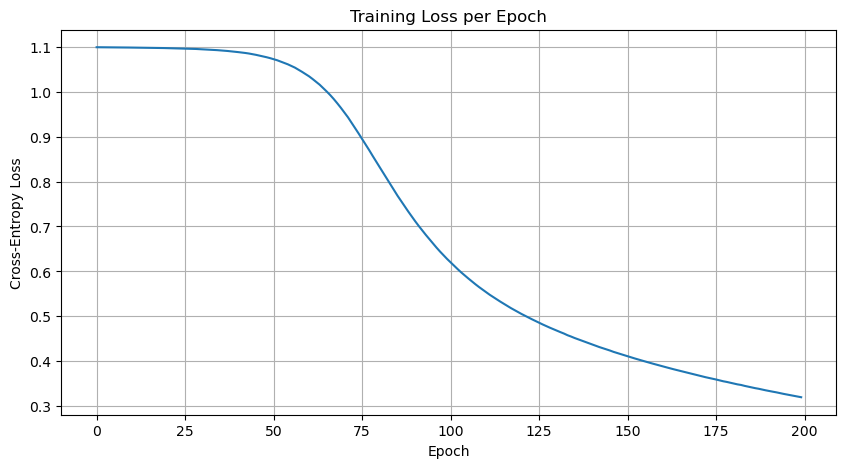

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(training_losses)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()

In [ ]:
# 5. Save the trained model (we already saved the best during training)
print("\nLoading best model for testing...")
new_model = Sequential(
    Linear(n_features, 64),
    ReLU(),
    Linear(64, n_classes)
)
# Load the best model saved during training
load_model(new_model, "best_digits_model.npz")

# 7. Test the loaded model on the held-out test set
y_pred_logits = new_model(X_test)
y_pred_classes = np.argmax(y_pred_logits, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"\nTest Accuracy (from loaded model): {accuracy * 100:.2f}%")

# Optionally show a classification report
print('\nClassification report:')
print(classification_report(y_test, y_pred_classes))

Model saved to iris_model.npz

Loading model for testing...
Model weights loaded successfully from iris_model.npz.

Test Accuracy (from loaded model): 93.33%
